# Project Title: Predicting Car Prices

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
col = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style','drive-wheels', 
       'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
      'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
      'price']
cars = pd.read_csv('imports-85.data', names=col)
pd.options.display.max_columns = 27
cars.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# Exploring and cleaning of the dataset

In [3]:
n_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[n_cols]

In [4]:
def clean_data(cars):
    cars['normalized-losses'] = cars['normalized-losses'].str.replace('?', '')
    cars['bore'] = cars['bore'].str.replace('?', '')
    cars['stroke'] = cars['stroke'].str.replace('?', '')
    cars['horsepower'] = cars['horsepower'].str.replace('?', '')
    cars['peak-rpm'] = cars['peak-rpm'].str.replace('?', '')
    cars['price'] = cars['price'].str.replace('?', '')
    typ = ['normalized-losses', 'bore', 'stroke', 'price']
    cars[typ] = cars[typ].apply(pd.to_numeric, axis=1)
    
    cars = cars.replace(r'^\s*$', np.nan, regex=True)
    return cars


cars = clean_data(cars)
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
def numericals(cars):
    numeric_cars = cars.select_dtypes(include=('float', 'integer'))
    numeric_cars = numeric_cars.dropna()    
    price_col = numeric_cars['price']
    numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
    numeric_cars['price'] = price_col
    return numeric_cars
numeric_cars = numericals(cars)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,city-mpg,highway-mpg,price
3,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.243655,0.464286,0.633333,0.18750,0.264706,0.333333,13950.0
4,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.380711,0.464286,0.633333,0.06250,0.088235,0.111111,17450.0
6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.380711,0.464286,0.633333,0.09375,0.117647,0.194444,17710.0
8,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.355330,0.421429,0.633333,0.08125,0.058824,0.055556,23875.0
10,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.238579,0.685714,0.347619,0.11250,0.235294,0.305556,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.775862,0.775610,0.754386,0.586538,0.567882,0.406091,0.885714,0.514286,0.15625,0.235294,0.277778,16845.0
201,0.157068,0.775862,0.775610,0.745614,0.586538,0.605508,0.406091,0.885714,0.514286,0.10625,0.117647,0.194444,19045.0
202,0.157068,0.775862,0.775610,0.754386,0.586538,0.591156,0.568528,0.742857,0.380952,0.11250,0.088235,0.138889,21485.0
203,0.157068,0.775862,0.775610,0.754386,0.586538,0.670675,0.426396,0.335714,0.633333,1.00000,0.323529,0.250000,22470.0


# Training and Testing Univariate Model

In [6]:
def knn_train_test(training_col, target_col, dataframe_object):
    np.random.seed(1)
    #Randomize and split the data into two 
    
    shuffle = np.random.permutation(dataframe_object.index)
    shuffled = dataframe_object.reindex(shuffle)
    split_obj = int(len(shuffled) / 2)
    feature = shuffled.iloc[0:split_obj]
    target = shuffled.iloc[split_obj:]
    
    #using k nearest neaighbors
    knn = KNeighborsRegressor()
    knn.fit(feature[[training_col]], feature[target_col])
    predictions = knn.predict(target[[training_col]])
    mse = np.abs(mean_squared_error(target[target_col], predictions))
    
    #calculatiing the root mean squared
    rmse = np.sqrt(mse)
    return rmse


train_cols = numeric_cars.columns.drop('price')
rmse_values = {}                    
for col in train_cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    if col in train_cols:
        rmse_values[col] = rmse

#Creating a pd.Series to easily understand the code        
rmse_values_series = pd.Series(rmse_values)

rmse_values_series.sort_values()
rmse_values_series

normalized-losses    5170.826749
wheel-base           3934.588779
length               3630.238015
width                2412.453947
height               5226.393339
curb-weight          2390.220625
engine-size          2901.870073
bore                 4059.664060
stroke               4962.983985
compression-ratio    6303.123350
city-mpg             2728.635704
highway-mpg          3769.561703
dtype: float64

In [7]:
def knn_train_test(training_col, target_col, dataframe_object):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(dataframe_object.index)
    shuffled = dataframe_object.reindex(shuffle)
    split_obj = int(len(shuffled) / 2)
    feature = shuffled.iloc[0:split_obj]
    target = shuffled.iloc[split_obj:]
    
    parameters = [1, 3, 5, 7, 9]
    k_values = {}
    
    for par in parameters:
        knn = KNeighborsRegressor(n_neighbors=par)
        knn.fit(feature[[training_col]], feature[target_col])
        predictions = knn.predict(target[[training_col]])
        mse = mean_squared_error(target[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_values[par] = rmse
    return k_values


train_cols = numeric_cars.columns.drop('price')
all_rmse_values = {}     

for col in train_cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    all_rmse_values[col] = rmse
        
    
all_rmse_values

{'normalized-losses': {1: 4520.568291155439,
  3: 4509.329357010863,
  5: 5170.826748838139,
  7: 5549.6778942197925,
  9: 5373.815956536121},
 'wheel-base': {1: 4239.563761461785,
  3: 4285.42843216664,
  5: 3934.588778830642,
  7: 4026.258534860972,
  9: 4052.5122965556275},
 'length': {1: 3723.113147958305,
  3: 3828.0279148233317,
  5: 3630.23801457976,
  7: 3648.3794705278924,
  9: 3524.435917961173},
 'width': {1: 3011.6234513132613,
  3: 2297.830040071623,
  5: 2412.4539472288375,
  7: 2396.7224132709885,
  9: 2547.6130116441873},
 'height': {1: 6277.936292086755,
  3: 5189.293650820355,
  5: 5226.393339340238,
  7: 5391.5573114455565,
  9: 5526.938089937321},
 'curb-weight': {1: 2945.27863919528,
  3: 2555.0087078564375,
  5: 2390.2206252770893,
  7: 2405.4334088025953,
  9: 2390.3598570063996},
 'engine-size': {1: 2892.1370774913144,
  3: 2350.109259575913,
  5: 2901.8700731597205,
  7: 3409.1641829824816,
  9: 3482.3745356189306},
 'bore': {1: 5219.654946689484,
  3: 4235.938

# Training and Testing Multivariate Model

In [8]:
numeric_cars_avg_rmse = {}
for k,v in all_rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    numeric_cars_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(numeric_cars_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

width                2533.248573
curb-weight          2537.260248
engine-size          3007.131026
city-mpg             3181.322356
length               3670.838893
highway-mpg          3681.152586
wheel-base           4107.670361
bore                 4337.568911
normalized-losses    5024.843650
stroke               5489.116147
height               5522.423737
compression-ratio    6245.550475
dtype: float64


In [9]:
def knn_train_test(training_cols, target_col, dataframe_object):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(dataframe_object.index)
    shuffled = dataframe_object.reindex(shuffle)
    split_obj = int(len(shuffled) / 2)
    feature = shuffled.iloc[0:split_obj]
    target = shuffled.iloc[split_obj:]
    
    parameters = [5]
    k_values = {}
    
    for par in parameters:
        knn = KNeighborsRegressor(n_neighbors=par)
        knn.fit(feature[training_cols], feature[target_col])
        predictions = knn.predict(target[training_cols])
        mse = mean_squared_error(target[target_col], predictions)
        rmse = np.sqrt(mse)
        
        
        k_values[par] = rmse
    return k_values  


train_cols = numeric_cars.columns.drop('price')
all_rmse_values = {}     

for best_feat_nr in range(2, 7):
    all_rmse_values['{} best features'.format(best_feat_nr)] = knn_train_test(sorted_features[:best_feat_nr], 'price', numeric_cars)
    
      
    
all_rmse_values

{'2 best features': {5: 2051.4090976692096},
 '3 best features': {5: 2166.958988075224},
 '4 best features': {5: 1968.7265363681163},
 '5 best features': {5: 2113.334006493058},
 '6 best features': {5: 2049.0850151958066}}

# Hyperparameters Tunning

In [10]:
def knn_train_test(training_cols, target_col, dataframe_object):
    
    np.random.seed(1)
    
    shuffle = np.random.permutation(dataframe_object.index)
    shuffled = dataframe_object.reindex(shuffle)
    split_obj = int(len(shuffled) / 2)
    feature = shuffled.iloc[0:split_obj]
    target = shuffled.iloc[split_obj:]
    
    parameters = [i for i in range(1, 25)]
    k_values = {}
    
    for par in parameters:
        knn = KNeighborsRegressor(n_neighbors=par)
        knn.fit(feature[training_cols], feature[target_col])
        predictions = knn.predict(target[training_cols])
        mse = mean_squared_error(target[target_col], predictions)
        rmse = mse**(1/2)
        
        
        k_values[par] = rmse
    return k_values  


train_cols = numeric_cars.columns.drop('price')
all_rmse_values = {}     

for best_feat_nr in range(2, 6):
    all_rmse_values['{} best features'.format(best_feat_nr)] = knn_train_test(sorted_features[:best_feat_nr], 'price', numeric_cars)
    
      
    
all_rmse_values

{'2 best features': {1: 2387.9726940440505,
  2: 2562.2065179499095,
  3: 2351.791755177788,
  4: 2125.0919029759043,
  5: 2051.4090976692096,
  6: 2069.1058811886464,
  7: 2147.2116914638814,
  8: 2153.021765077733,
  9: 2224.9459077555734,
  10: 2305.190976009363,
  11: 2252.2036138602402,
  12: 2267.124322268527,
  13: 2345.3037301881222,
  14: 2364.91651001938,
  15: 2427.7042365507928,
  16: 2441.385463211508,
  17: 2448.4393148324,
  18: 2469.0115669137745,
  19: 2527.132023855744,
  20: 2562.9433297480455,
  21: 2588.9784038542275,
  22: 2601.885467870026,
  23: 2654.111960997932,
  24: 2677.491899558339},
 '3 best features': {1: 1783.0127944016554,
  2: 1943.8811539353428,
  3: 1935.9005527144209,
  4: 2022.160902506277,
  5: 2166.958988075224,
  6: 2163.3602461249693,
  7: 2290.0407434438043,
  8: 2346.4664724741565,
  9: 2332.408546035039,
  10: 2315.3559483640956,
  11: 2338.75883858554,
  12: 2290.829588104735,
  13: 2355.012868483918,
  14: 2399.885989134033,
  15: 2427.04

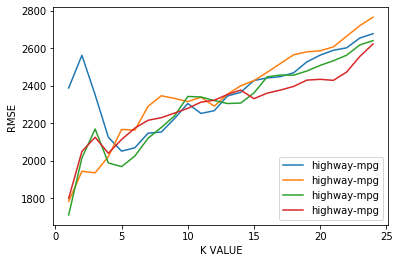

In [11]:
for a,v in all_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('K VALUE')
plt.ylabel('RMSE')
plt.legend()
plt.show()